<a href="https://colab.research.google.com/github/shakshikumari123/Covid_case_study/blob/main/Covid_19_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q1.1: Uploading datasets using pandas


In [71]:
confirmed_cases_data = pd.read_csv("/content/covid_19_confirmed_v1_lyst1747728690432.csv")
death_cases_data = pd.read_csv("/content/covid_19_deaths_v1_lyst1747728711771.csv")
recovery_cases_data = pd.read_csv("/content/covid_19_recovered_v1_lyst1747728719904.csv")

recovery_cases_data.columns = recovery_cases_data.iloc[0]
death_cases_data.columns = death_cases_data.iloc[0]

# Q2: Data exploration
# Q2.1: Structure and datatypes

In [72]:
print(f"Confirmed cases:\n Shape: {confirmed_cases_data.shape}\n Dtypes:\n{confirmed_cases_data.dtypes}\n")
print(f"Death cases:\n Shape: {death_cases_data.shape}\n Dtypes:\n{death_cases_data.dtypes}\n")
print(f"Recovery cases:\n Shape: {recovery_cases_data.shape}\n Dtypes:\n{recovery_cases_data.dtypes}\n")

Confirmed cases:
 Shape: (276, 498)
 Dtypes:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

Death cases:
 Shape: (277, 498)
 Dtypes:
0
Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20           object
                   ...  
5/25/21           object
5/26/21           object
5/27/21           object
5/28/21           object
5/29/21           object
Length: 498, dtype: object

Recovery cases:
 Shape: (262, 498)
 Dtypes:
0
Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20           object
                   ...  
5/25/21           object
5/26/21           object
5/27/21           object
5/28/21           object

# Q2.2: Generating plots of confirmed cases over time for the top 5 countries


<ipython-input-73-eb6144e80533>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirm_group.columns = pd.to_datetime(confirm_group.columns)


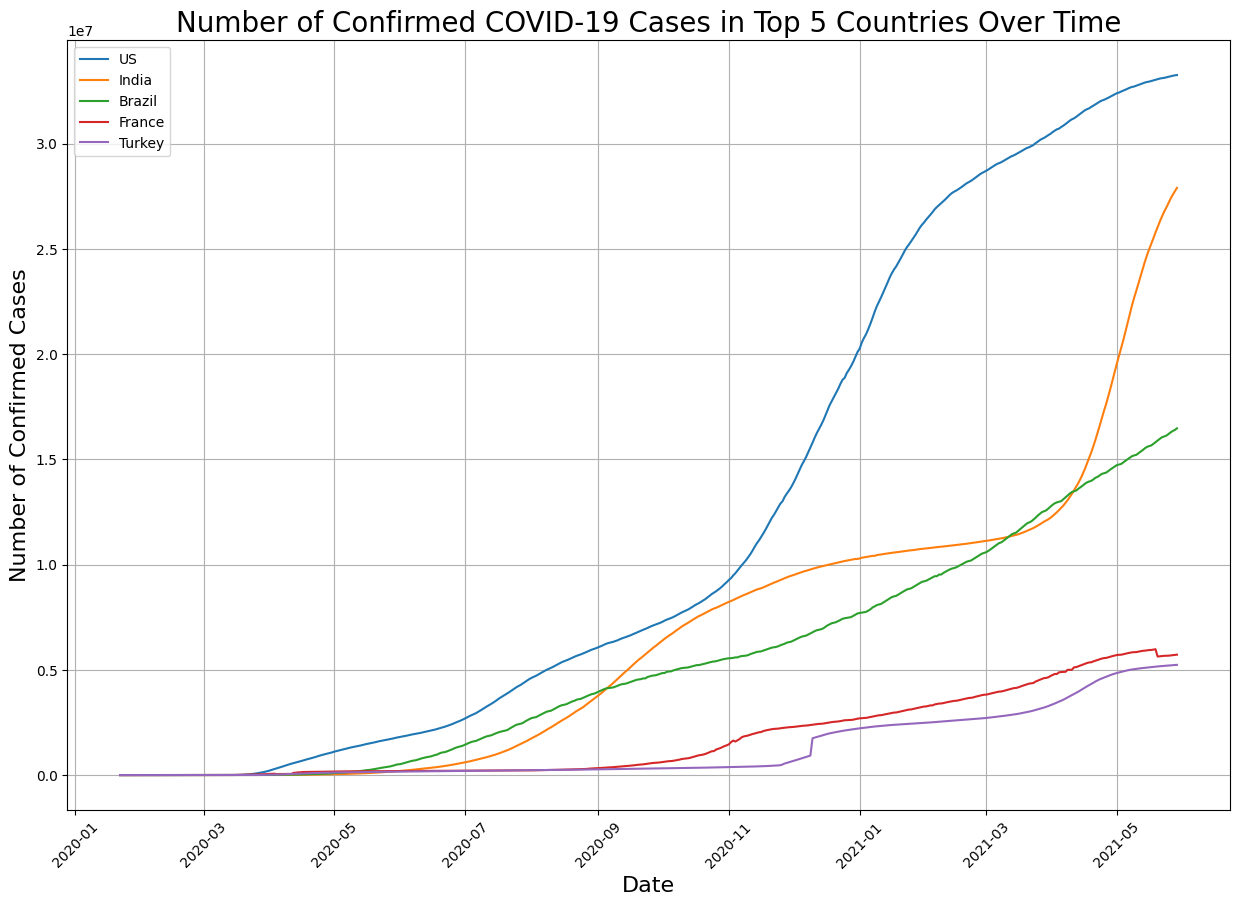

In [73]:
plt.figure(figsize=(15, 10))
confirm_group = confirmed_cases_data.groupby("Country/Region").sum()
confirm_group = confirm_group.drop(columns=["Lat", "Long"])
date_columns = confirmed_cases_data.columns[4:]
confirm_group = confirm_group[date_columns]
confirm_group.columns = pd.to_datetime(confirm_group.columns)
latest_date = confirm_group.columns[-1]
top_countries = confirm_group[latest_date].sort_values(ascending=False).head(5).index
for country in top_countries:
    plt.plot(confirm_group.columns, confirm_group.loc[country], label=country)

plt.title("Number of Confirmed COVID-19 Cases in Top 5 Countries Over Time", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Number of Confirmed Cases", fontsize=16)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig("Cofirmed_cases_in_top5_coountries.png")
plt.show()

# Q2.3: Generating plots of confirmed cases over time in china

<ipython-input-74-ac60f20b56b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases_china.drop(columns= ["Lat","Long"],inplace=True )
<ipython-input-74-ac60f20b56b9>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_cases_china.columns = pd.to_datetime(confirmed_cases_china.columns)


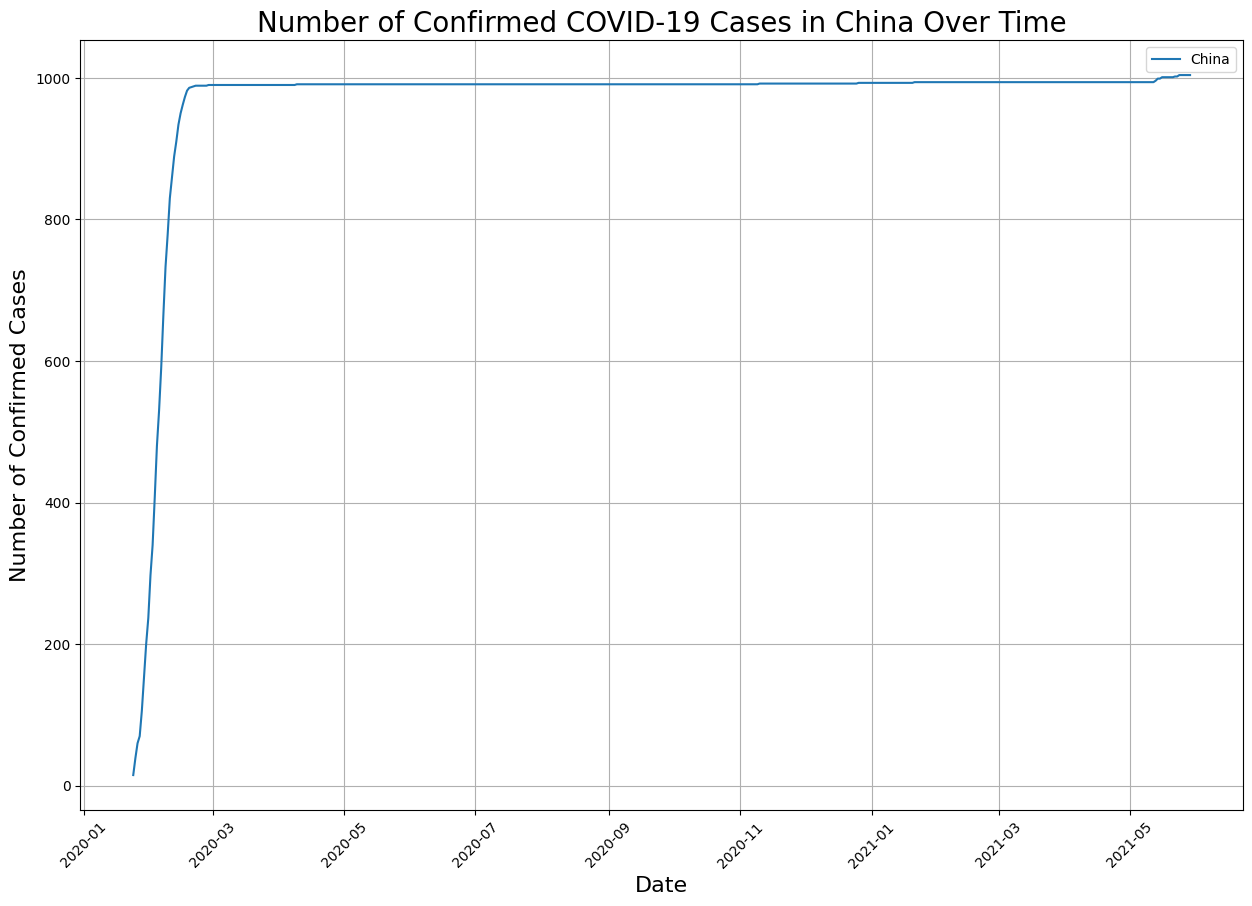

In [74]:
plt.figure(figsize=(15,10))
confirmed_cases_china = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "China"]
confirmed_cases_china.drop(columns= ["Lat","Long"],inplace=True )
date_china= confirmed_cases_china.columns[4:]
confirmed_cases_china = confirmed_cases_china[date_china]
confirmed_cases_china.columns = pd.to_datetime(confirmed_cases_china.columns)
latest_date_china = confirmed_cases_china.columns[-1]
plt.plot(confirmed_cases_china.columns, confirmed_cases_china.iloc[0], label="China")
plt.title("Number of Confirmed COVID-19 Cases in China Over Time", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Number of Confirmed Cases", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

#Q3: Handling missing data
#Q3.1: Identifying missing values and replacing them using a suitable imputation method, such as forward filling, for time-series data.

In [75]:
#For confirmed cases dataset
confirmed_cases_dates = confirmed_cases_data.columns[4:]
print(confirmed_cases_data.isnull().sum())
confirmed_cases_data[confirmed_cases_dates].fillna(method="ffill", inplace=True)
print(confirmed_cases_data.isnull().sum())

#For deaths cases dataset
death_cases_dates = death_cases_data.columns[4:]
print(death_cases_data.isnull().sum())
death_cases_data[death_cases_dates].fillna(method="ffill", inplace=True)
print(death_cases_data.isnull().sum())

#For recovery cases dataset
recovery_cases_dates = recovery_cases_data.columns[4:]
print(recovery_cases_data.isnull().sum())
recovery_cases_data[recovery_cases_dates].fillna(method="ffill", inplace=True)
print(recovery_cases_data.isnull().sum())

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
0
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64
0
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21         

<ipython-input-75-51dbe89b86ec>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confirmed_cases_data[confirmed_cases_dates].fillna(method="ffill", inplace=True)
<ipython-input-75-51dbe89b86ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases_data[confirmed_cases_dates].fillna(method="ffill", inplace=True)
<ipython-input-75-51dbe89b86ec>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  death_cases_data[death_cases_dates].fillna(method="ffill", inplace=True)
<ipython-input-75-51dbe89b86ec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

#Q4: Data cleaning and preparation
#Q4.1: Replacing blank values in the province column with "All Provinces"

In [96]:
#Confirmed cases
confirmed_cases_data["Province/State"].fillna("All Provinces", inplace=True)
confirmed_cases_data.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,All Provinces,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,All Provinces,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,All Provinces,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,All Provinces,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [98]:
#Recovery cases
recovery_cases_data["Province/State"].fillna("All Provinces", inplace=True)
recovery_cases_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
2,All Provinces,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
3,All Provinces,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
4,All Provinces,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416


In [99]:
#Death cases
death_cases_data["Province/State"].fillna("All Provinces", inplace=True)
death_cases_data.head()

<ipython-input-99-bac8ee7896ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  death_cases_data["Province/State"].fillna("All Provinces", inplace=True)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,All Provinces,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,All Provinces,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
3,All Provinces,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
4,All Provinces,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127


#Q5: Independent dataset analysis
#Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

In [77]:
germany_data = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "Germany"].drop(columns=["Lat","Long","Country/Region","Province/State"])
france_data = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "France"].drop(columns=["Lat","Long","Country/Region","Province/State"])
italy_data = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "Italy"].drop(columns=["Lat","Long","Country/Region","Province/State"])

Highest_surge_germany = germany_data.max().max()
print(f"Highest number of confirmed cases in germany: {Highest_surge_germany}")

Highest_surge_france = france_data.max().max()
print(f"Highest number of confirmed cases in France: {Highest_surge_france}")

Highest_surge_italy = italy_data.max().max()
print(f"Highest number of confirmed cases in Italy: {Highest_surge_italy}")

Highest_surge_overall = max(Highest_surge_germany,Highest_surge_france,Highest_surge_italy)
confirmed_cases_dates = confirmed_cases_data.columns[4:]
confirmed_cases_dates_only= confirmed_cases_data[confirmed_cases_dates]
maximun_surge= confirmed_cases_dates_only==Highest_surge_overall

maximun_surge_date= confirmed_cases_dates_only.columns[maximun_surge.any(axis=0)].tolist()

if Highest_surge_overall == Highest_surge_germany:
    surge_country = "Germany"
elif Highest_surge_overall == Highest_surge_france:
    surge_country = "France"
elif Highest_surge_overall == Highest_surge_italy:
    surge_country = "Italy"
else:
    surge_country = "an unknown country"

print(f"The highest number of confirmed cases was {Highest_surge_overall} in {surge_country} and it occured on {maximun_surge_date}  ")


Highest number of confirmed cases in germany: 3684672
Highest number of confirmed cases in France: 5863138
Highest number of confirmed cases in Italy: 4213055
The highest number of confirmed cases was 5863138 in France and it occured on ['5/19/21']  


#Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?


In [78]:
date_to_check = '12/31/20'

#Canada recovery rate
Canada_recovery_data = recovery_cases_data[recovery_cases_data["Country/Region"] == "Canada"]
Canada_confirmed_data = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "Canada"]

Canada_confirmed_data[date_to_check] = pd.to_numeric(Canada_confirmed_data[date_to_check], errors='coerce')
Canada_recovery_data[date_to_check] = pd.to_numeric(Canada_recovery_data[date_to_check], errors='coerce')

Canada_confirmed_total = Canada_confirmed_data[date_to_check].sum()
Canada_recovery_total = Canada_recovery_data[date_to_check].sum()

Canada_recovery_rate = (Canada_recovery_total / Canada_confirmed_total)
print(f"Canada Recovery Rate as of {date_to_check}: {Canada_recovery_rate:.6f}")

#Australia recovery rate
Australia_recovery_data = recovery_cases_data[recovery_cases_data["Country/Region"] == "Australia"]
Australia_confirmed_data = confirmed_cases_data[confirmed_cases_data["Country/Region"] == "Australia"]

Australia_confirmed_data[date_to_check] = pd.to_numeric(Australia_confirmed_data[date_to_check], errors='coerce')
Australia_recovery_data[date_to_check] = pd.to_numeric(Australia_recovery_data[date_to_check], errors='coerce')

Australia_confirmed_total = Australia_confirmed_data[date_to_check].sum()
Australia_recovery_total = Australia_recovery_data[date_to_check].sum()

Australia_recovery_rate = (Australia_recovery_total / Australia_confirmed_total)
print(f"Australia Recovery Rate as of {date_to_check}: {Australia_recovery_rate:.6f}")

#Comparing the recovery rates of both countries
if Canada_recovery_rate > Australia_recovery_rate:
    print("Canada showed better management of the pandemic based on the recovery rate.")
elif Australia_recovery_rate > Canada_recovery_rate:
    print("Australia showed better management of the pandemic based on the recovery rate.")


Canada Recovery Rate as of 12/31/20: 0.844679
Australia Recovery Rate as of 12/31/20: 0.793843
Canada showed better management of the pandemic based on the recovery rate.


<ipython-input-78-9bdca963f426>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_confirmed_data[date_to_check] = pd.to_numeric(Canada_confirmed_data[date_to_check], errors='coerce')
<ipython-input-78-9bdca963f426>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Canada_recovery_data[date_to_check] = pd.to_numeric(Canada_recovery_data[date_to_check], errors='coerce')
<ipython-input-78-9bdca963f426>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

#Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [79]:
Canada_death_data = death_cases_data[death_cases_data['Country/Region'] == 'Canada']

Canada_confirmed_latest = Canada_confirmed_data.groupby('Province/State')[ confirmed_cases_data.columns[-1]].sum()
Canada_deaths_latest = Canada_death_data.groupby('Province/State')[ confirmed_cases_data.columns[-1]].sum()

Canada_confirmed_latest = pd.to_numeric(Canada_confirmed_latest, errors='coerce')
Canada_deaths_latest = pd.to_numeric(Canada_deaths_latest, errors='coerce')

Canada_death_rate = (Canada_deaths_latest / Canada_confirmed_latest).fillna(0).sort_values(ascending=False)
print(f"Distribution of death rates among all provinces of Canada:\n{Canada_death_rate}")

print(f"Province with the highest death rate: {Canada_death_rate.index[0]}")
print(f"Province with the lowest death rate: {Canada_death_rate.index[-1]}")

Distribution of death rates among all provinces of Canada:
Province/State
Diamond Princess                  inf
Quebec                       0.030090
Yukon                        0.023810
Manitoba                     0.020693
New Brunswick                0.019626
Ontario                      0.016193
Nova Scotia                  0.015190
British Columbia             0.011784
Saskatchewan                 0.011557
Alberta                      0.009760
Nunavut                      0.006173
Newfoundland and Labrador    0.004608
Northwest Territories        0.000000
Grand Princess               0.000000
Prince Edward Island         0.000000
Repatriated Travellers       0.000000
Name: 5/29/21, dtype: float64
Province with the highest death rate: Diamond Princess
Province with the lowest death rate: Repatriated Travellers


#Q6: Data Transformation
#Q6.1: Transform the 'deaths' dataset from wide format to long format

In [80]:
death_dates = death_cases_data.columns[4:]
death_cases_long = death_cases_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],value_vars=death_dates,var_name='Date',value_name='Deaths')
death_cases_long['Date'] = pd.to_datetime(death_cases_long['Date'])
death_cases_long['Deaths'] = pd.to_numeric(death_cases_long['Deaths'], errors='coerce')
print(f"Tranformed datset in long format : {death_cases_long.head()}")

<ipython-input-80-097776612737>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  death_cases_long['Date'] = pd.to_datetime(death_cases_long['Date'])


Tranformed datset in long format :    Province/State  Country/Region       Lat       Long       Date  Deaths
0  Province/State  Country/Region       Lat       Long 2020-01-22     NaN
1   All Provinces     Afghanistan  33.93911  67.709953 2020-01-22     0.0
2   All Provinces         Albania   41.1533    20.1683 2020-01-22     0.0
3   All Provinces         Algeria   28.0339     1.6596 2020-01-22     0.0
4   All Provinces         Andorra   42.5063     1.5218 2020-01-22     0.0


#Q6.2: Total number of deaths reported per country up to current date

In [81]:
total_deaths_per_country = death_cases_long.groupby('Country/Region')['Deaths'].sum()
print(f"Total number of deaths reported per country up to current date:\n{total_deaths_per_country}")

Total number of deaths reported per country up to current date:
Country/Region
Afghanistan           669075.0
Albania               375955.0
Algeria               834080.0
Andorra                32100.0
Angola                116489.0
                        ...   
Vietnam                10220.0
West Bank and Gaza    440368.0
Yemen                 237613.0
Zambia                205990.0
Zimbabwe              237234.0
Name: Deaths, Length: 194, dtype: float64


#Q6.3: Top 5 countries with highest daily death

In [82]:
Daily_death_data= death_cases_data.copy()
Daily_death_data= Daily_death_data.drop(columns=["Province/State"])
Daily_death_data= Daily_death_data.set_index(['Country/Region','Lat','Long'])
Daily_death_data.columns= pd.to_datetime(Daily_death_data.columns,errors='coerce')
Daily_death_data= Daily_death_data.select_dtypes(include=np.datetime64)
Daily_death_data= Daily_death_data.apply(lambda x: pd.to_numeric(x,errors='coerce')).diff(axis=1)
Daily_death_data= Daily_death_data.fillna(0)
Daily_death_data.head()



<ipython-input-82-e92548921d73>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Daily_death_data.columns= pd.to_datetime(Daily_death_data.columns,errors='coerce')


,,
Country/Region,Lat,Long
Country/Region,Lat,Long
Afghanistan,33.93911,67.709953
Albania,41.1533,20.1683
Algeria,28.0339,1.6596
Andorra,42.5063,1.5218


#Q6.4: Evolution to total deaths in United States over time

<ipython-input-95-9d8f200faa73>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  US_deaths_data.index = pd.to_datetime(US_deaths_data.index)


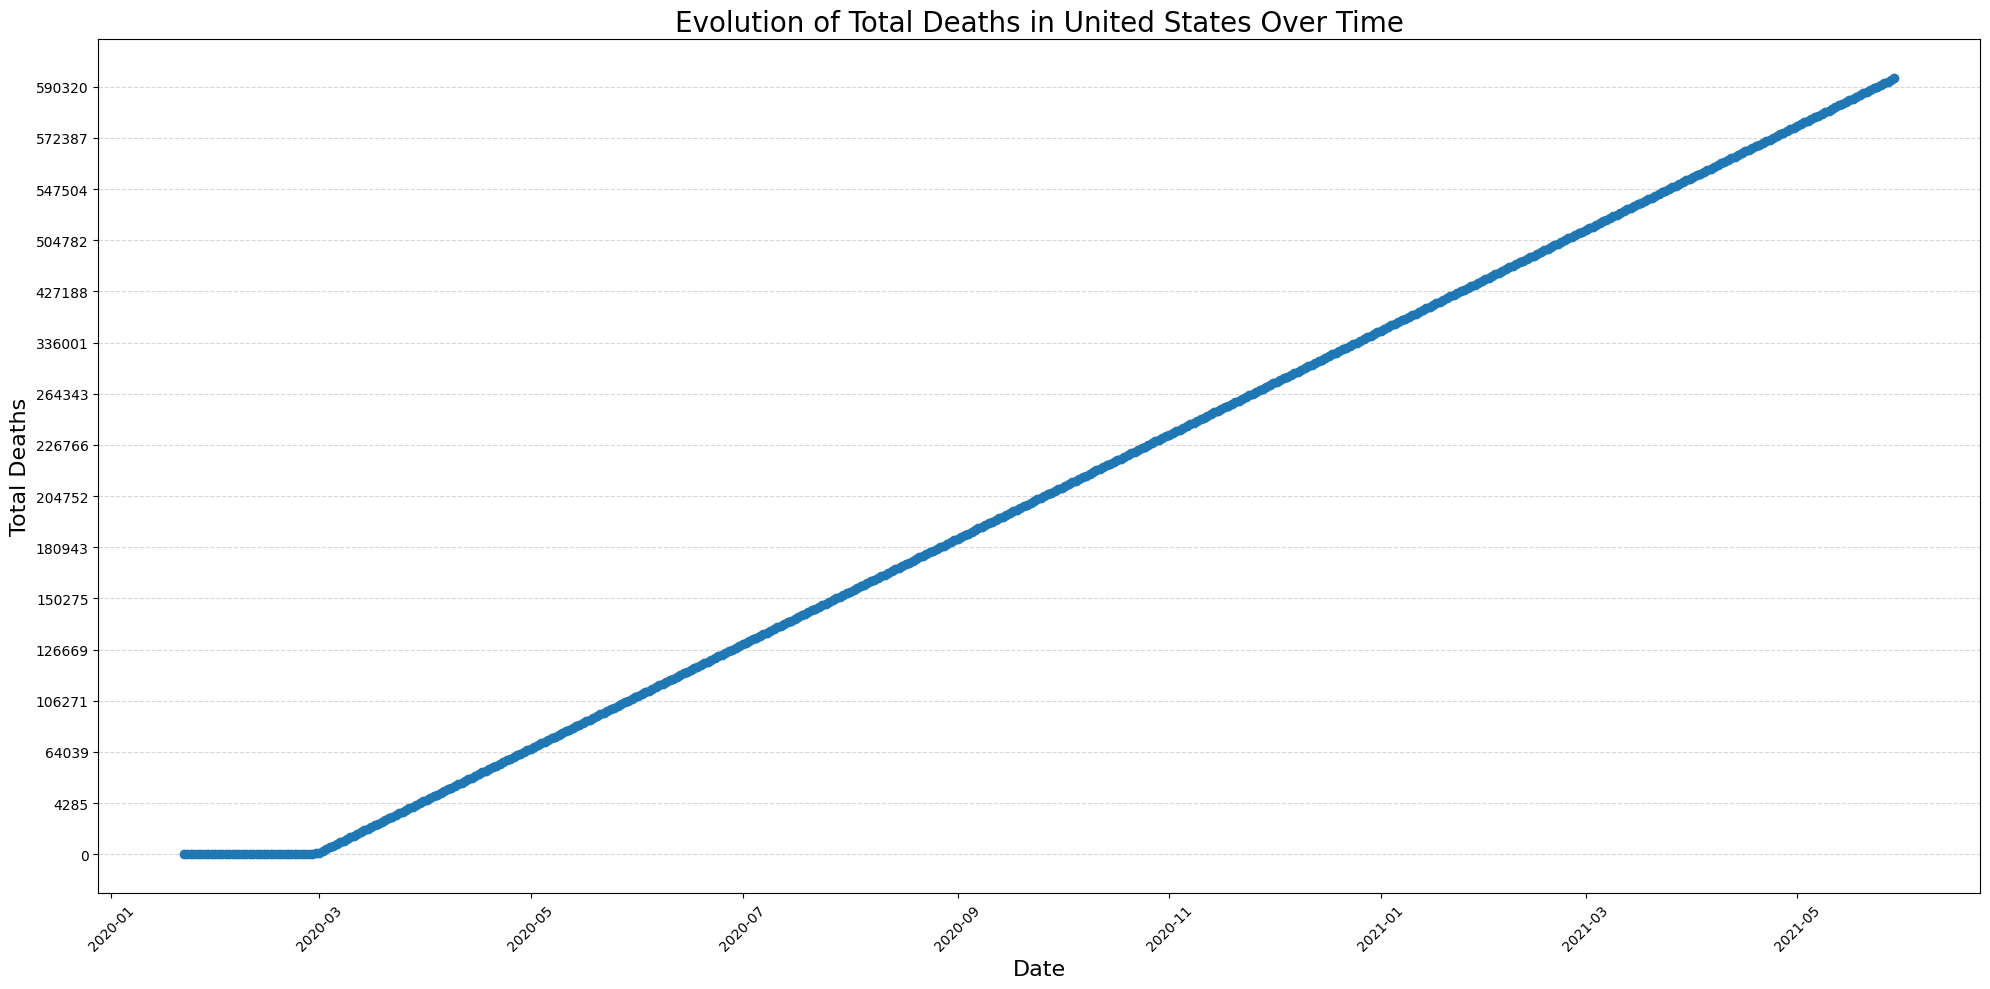

In [95]:
US_deaths_data = death_cases_data[death_cases_data['Country/Region'] == 'US'].copy()
US_deaths_data = US_deaths_data.drop(columns=['Province/State', 'Lat', 'Long'])
US_deaths_data = US_deaths_data.groupby('Country/Region').sum()
US_deaths_data = US_deaths_data.transpose()
US_deaths_data.index = pd.to_datetime(US_deaths_data.index)
US_deaths_data.columns = ['Total Deaths']

#Ploting a bar graph
plt.figure(figsize=(20, 10))
plt.plot(US_deaths_data.index, US_deaths_data['Total Deaths'], marker='o', linestyle='-')
plt.title("Evolution of Total Deaths in United States Over Time", fontsize=20)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Total Deaths", fontsize=16)
plt.xticks(rotation=45)
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=20))
plt.tight_layout()
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
plt.show()


#Q7: Data merging
#Q7.1: Merge the three datasets

In [84]:
date_columns = confirmed_cases_data.columns[4:]
columns_to_merge = ['Country/Region'] + list(date_columns)

confirmed_subset = confirmed_cases_data[columns_to_merge]
death_subset = death_cases_data[columns_to_merge]
recovery_subset = recovery_cases_data[columns_to_merge]

confirmed_long = confirmed_subset.melt(id_vars=['Country/Region'], var_name='Date', value_name='Confirmed')
death_long = death_subset.melt(id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
recovery_long = recovery_subset.melt(id_vars=['Country/Region'], var_name='Date', value_name='Recovered')

confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], errors='coerce')
death_long['Date'] = pd.to_datetime(death_long['Date'], errors='coerce')
recovery_long['Date'] = pd.to_datetime(recovery_long['Date'], errors='coerce')

confirmed_long['Confirmed'] = pd.to_numeric(confirmed_long['Confirmed'], errors='coerce')
death_long['Deaths'] = pd.to_numeric(death_long['Deaths'], errors='coerce')
recovery_long['Recovered'] = pd.to_numeric(recovery_long['Recovered'], errors='coerce')

merged_dataset = pd.merge(confirmed_long, death_long, on=['Country/Region', 'Date'], how='outer')
merged_dataset = pd.merge(merged_dataset, recovery_long, on=['Country/Region', 'Date'], how='outer')
print(merged_dataset.sort_values(ascending=False,by='Date').head())

<ipython-input-84-dd6bb88ddfda>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'], errors='coerce')
<ipython-input-84-dd6bb88ddfda>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  death_long['Date'] = pd.to_datetime(death_long['Date'], errors='coerce')
<ipython-input-84-dd6bb88ddfda>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  recovery_long['Date'] = pd.to_datetime(recovery_long['Date'], errors='coerce')


         Country/Region       Date  Confirmed  Deaths  Recovered
21670297       Zimbabwe 2021-05-29    38933.0  1594.0    36578.0
19790576          China 2021-05-29      387.0     8.0      268.0
19790600          China 2021-05-29      387.0     8.0       10.0
19790599          China 2021-05-29      387.0     8.0        1.0
19790598          China 2021-05-29      387.0     8.0      380.0


#Q7.2: Analyzing monthly sum of confirmed,recovery and death cases

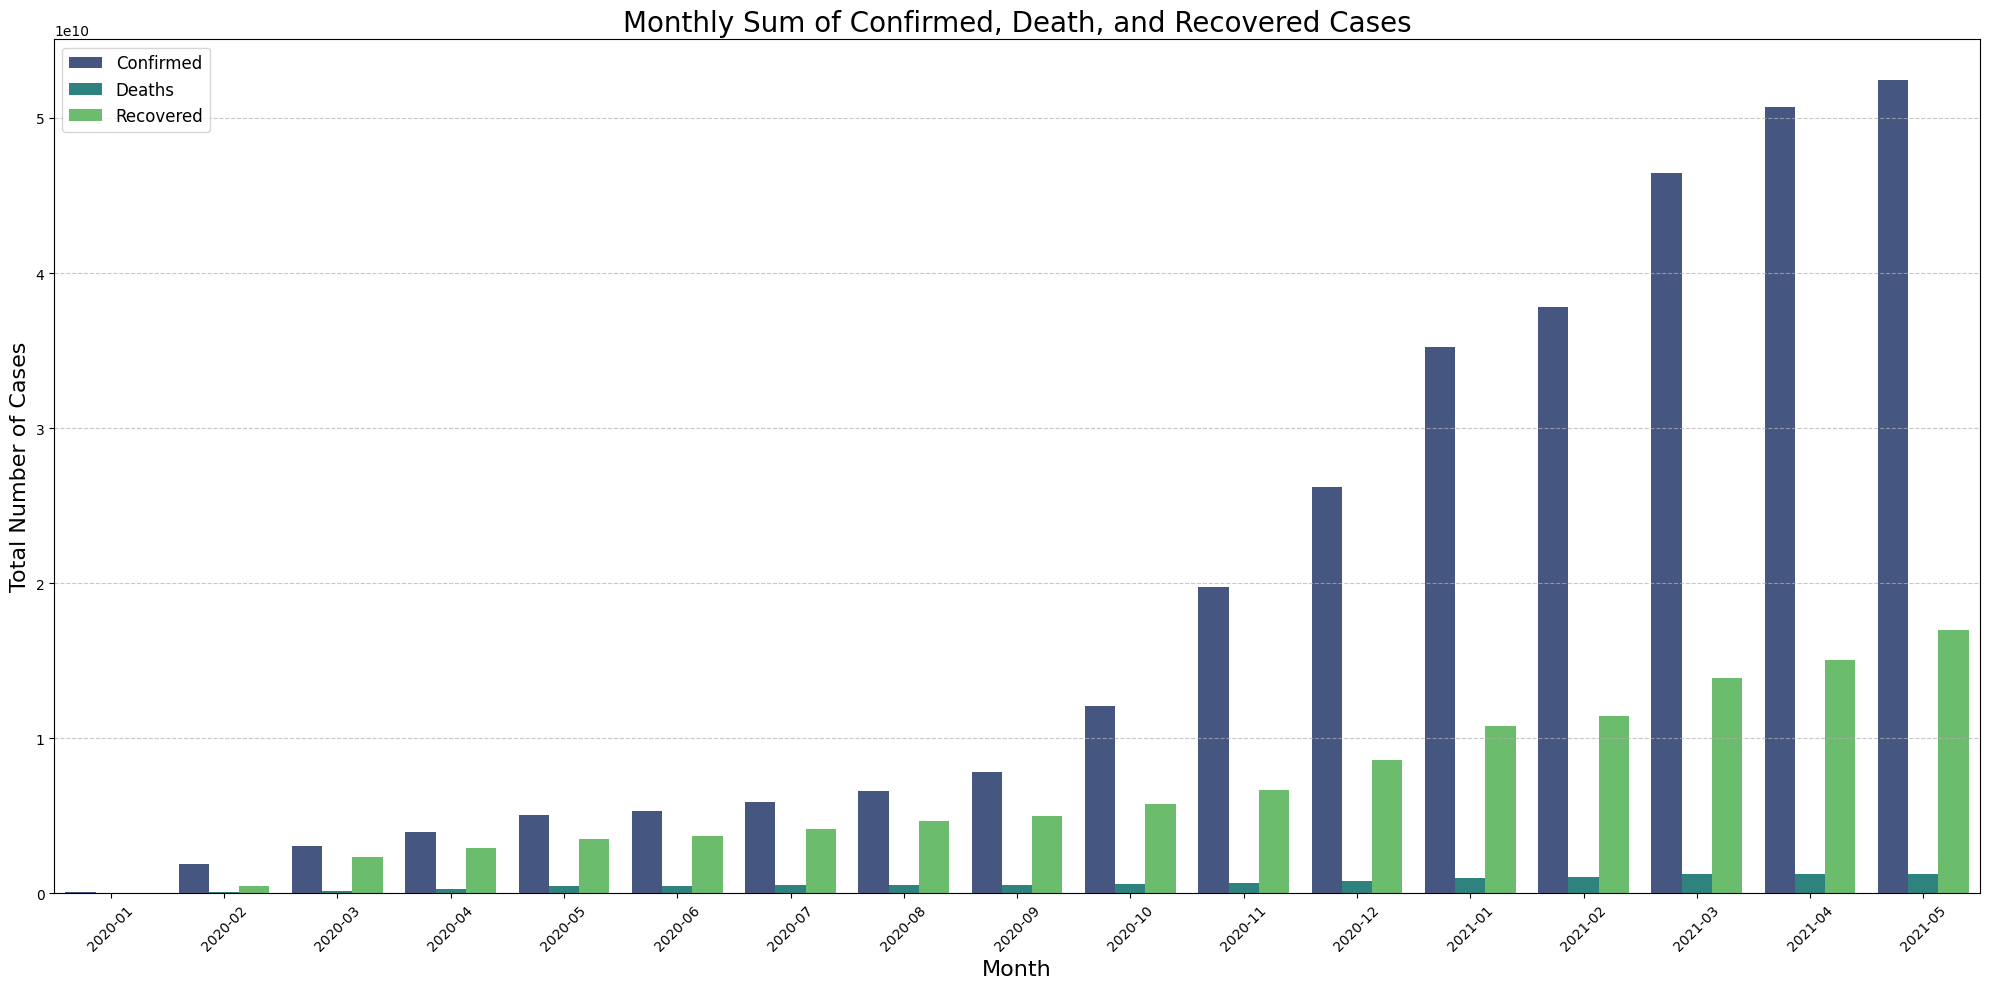

In [85]:
merged_dataset['Date'] = pd.to_datetime(merged_dataset['Date'])
merged_dataset['Month'] = merged_dataset['Date'].dt.to_period('M')
monthly_summary = merged_dataset.groupby('Month')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
monthly_summary['Month'] = monthly_summary['Month'].astype(str)
monthly_summary_melted = monthly_summary.melt(id_vars=['Month'],value_vars=['Confirmed', 'Deaths', 'Recovered'],var_name='Case Type',value_name='Total Cases')

plt.figure(figsize=(20, 10))
sns.barplot(data=monthly_summary_melted, x='Month', y='Total Cases', hue='Case Type', palette='viridis')

plt.title('Monthly Sum of Confirmed, Death, and Recovered Cases', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total Number of Cases', fontsize=16)
plt.xticks(rotation=45)
plt.legend( fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Q7.3: Doing the above analises for US, Italy and Brazil

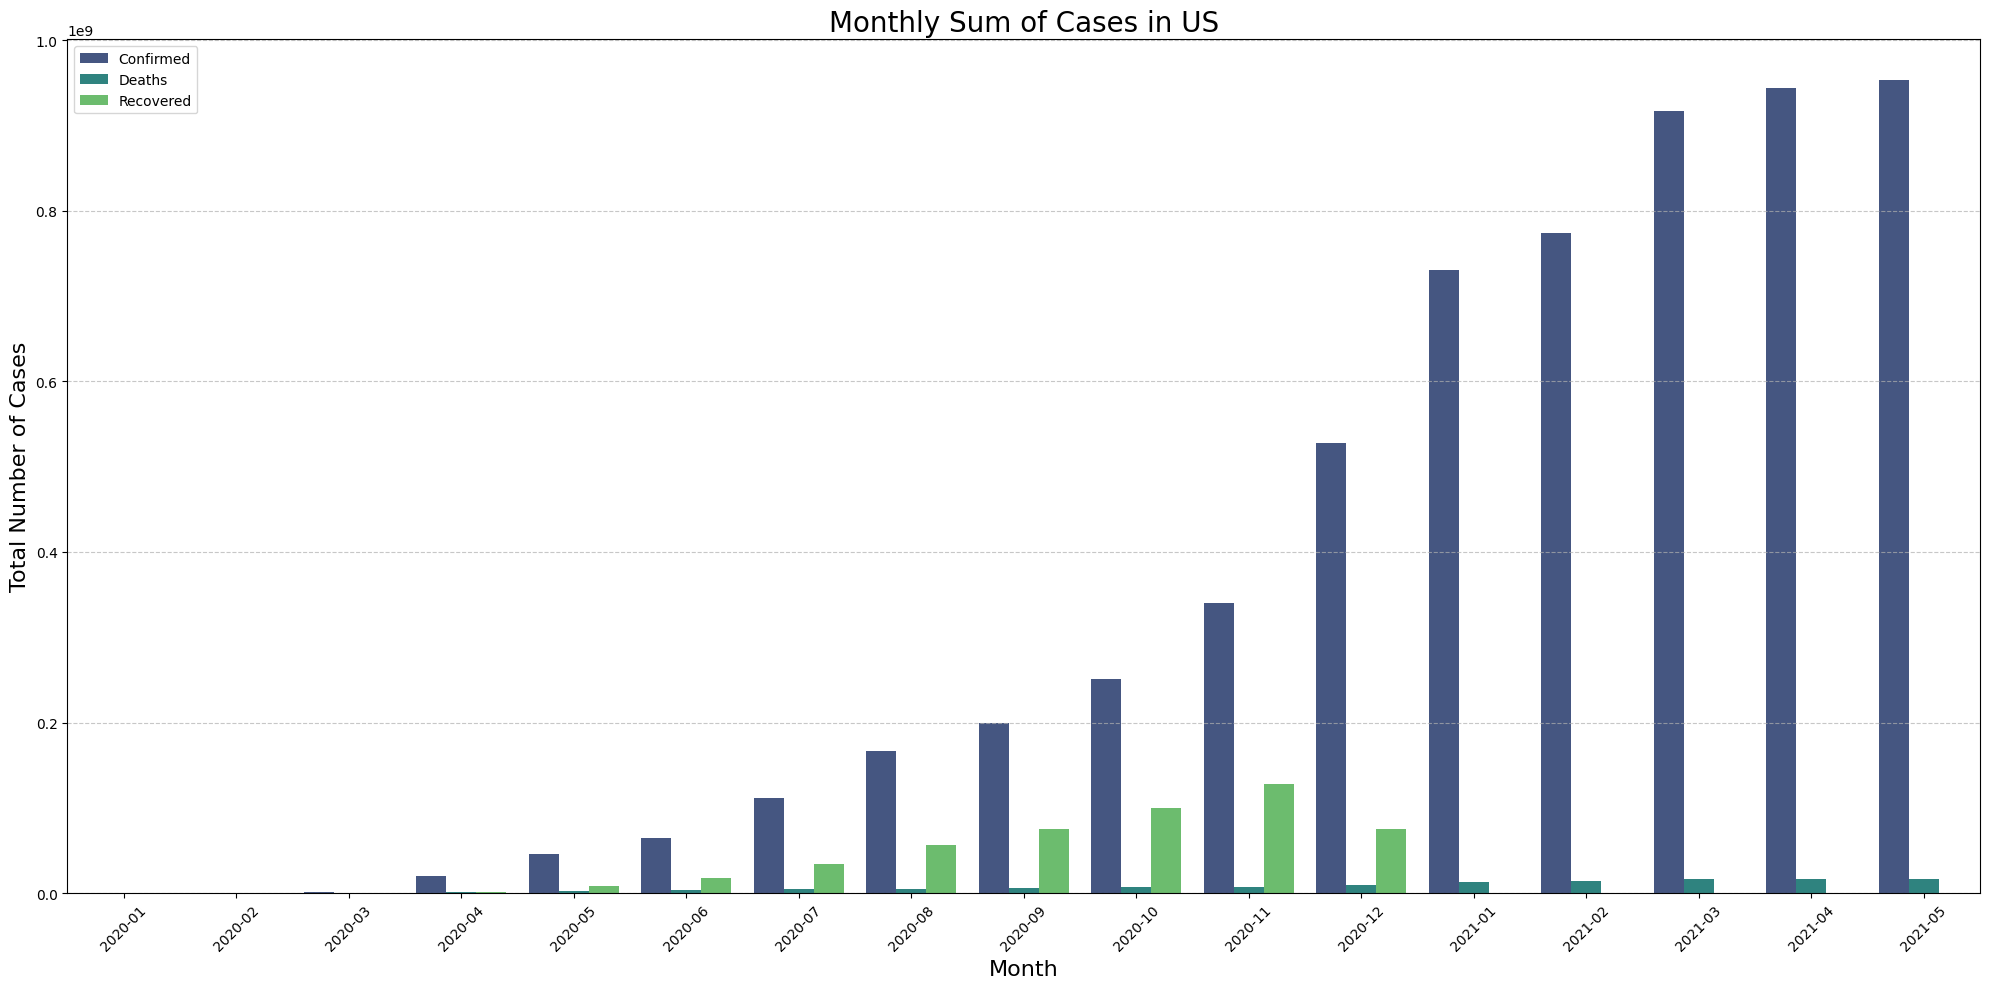

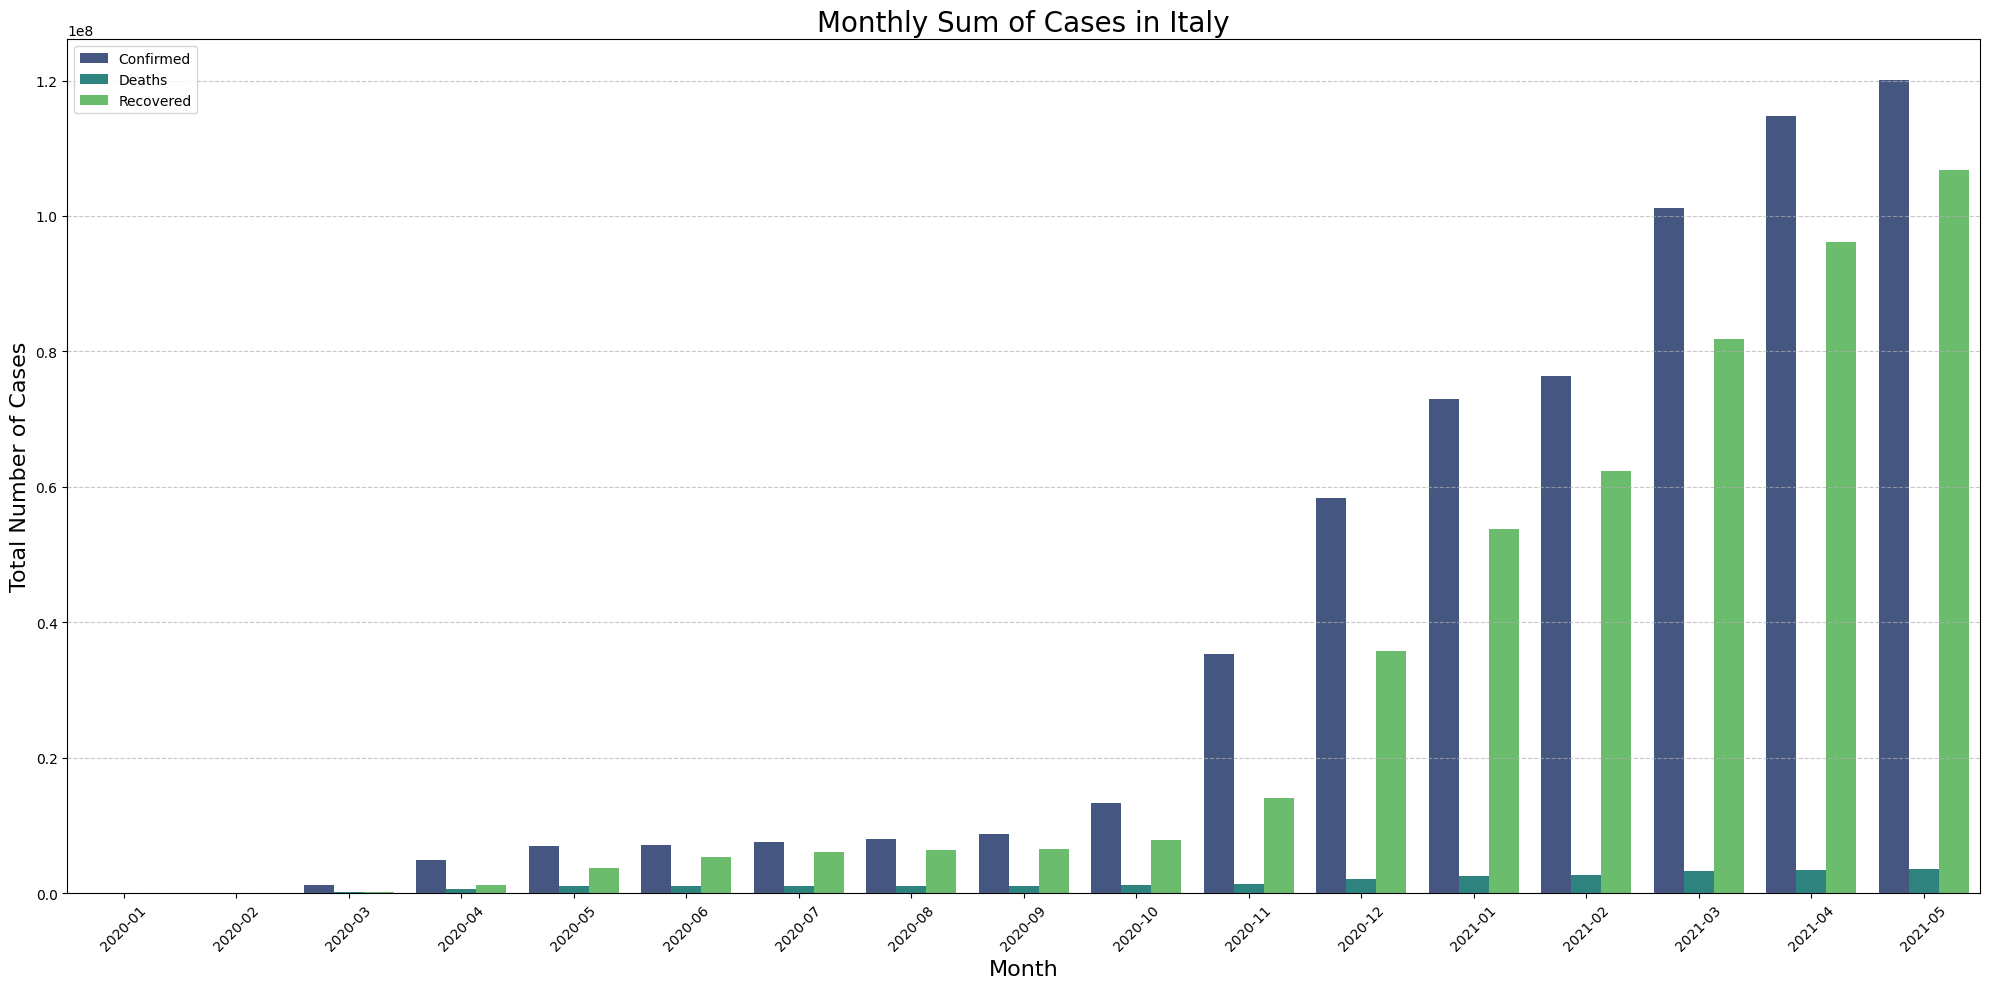

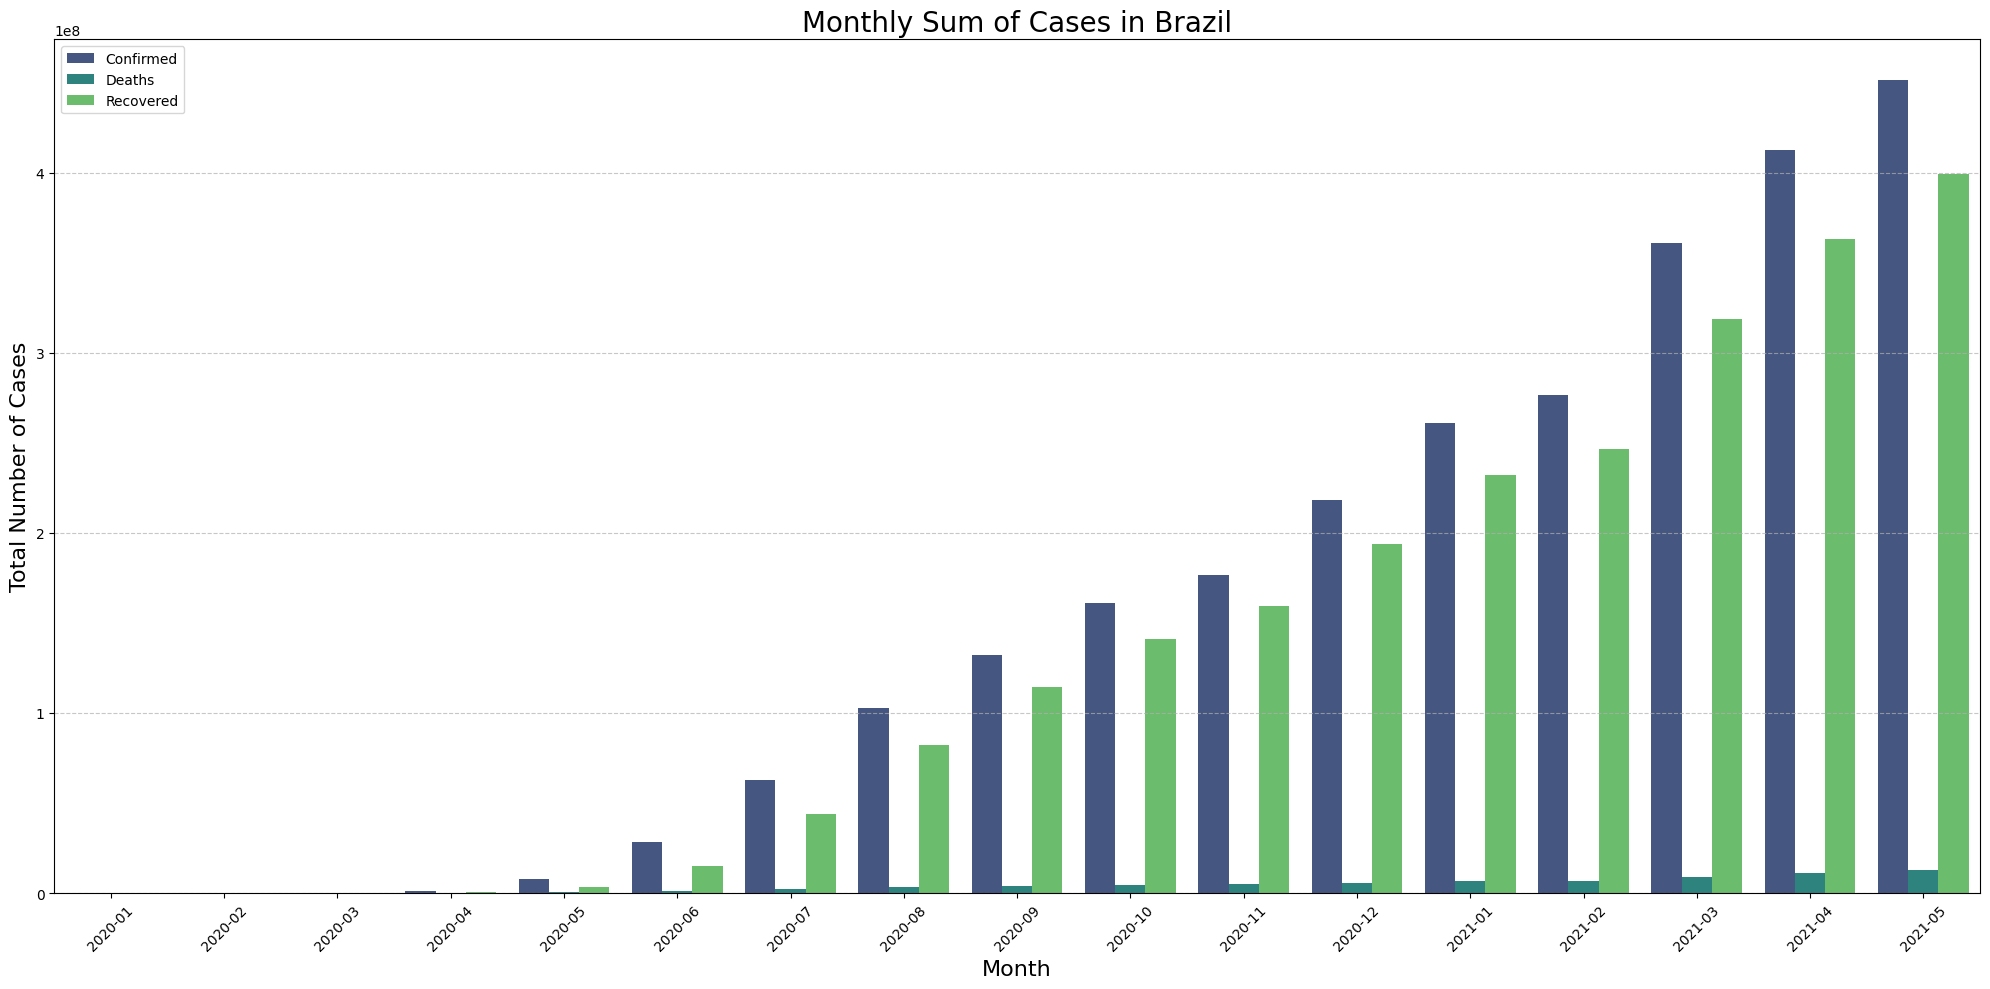

In [86]:
countries_of_interest = ['US', 'Italy', 'Brazil']
filtered_countries_data = merged_dataset[merged_dataset['Country/Region'].isin(countries_of_interest)].copy()
filtered_countries_data['Date'] = pd.to_datetime(filtered_countries_data['Date'])
filtered_countries_data['Month'] = filtered_countries_data['Date'].dt.to_period('M')
monthly_summary_countries = filtered_countries_data.groupby(['Country/Region', 'Month'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
monthly_summary_countries['Month'] = monthly_summary_countries['Month'].astype(str)
monthly_summary_melted_countries = monthly_summary_countries.melt(id_vars=['Country/Region', 'Month'],
                                                                  value_vars=['Confirmed', 'Deaths', 'Recovered'],
                                                                  var_name='Case Type',
                                                                  value_name='Total Cases')

for country in countries_of_interest:
    plt.figure(figsize=(20, 10))
    sns.barplot(data=monthly_summary_melted_countries[monthly_summary_melted_countries['Country/Region'] == country],
                x='Month', y='Total Cases', hue='Case Type', palette='viridis')
    plt.title(f'Monthly Sum of Cases in {country}', fontsize=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('Total Number of Cases', fontsize=16)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


#Q8: Combined data analysis
#Q8.1: Top three countries with highest death rate throughout 2020

    Country/Region    Confirmed      Deaths    Recovered  Death Rate
191          Yemen     382306.0    108944.0     220558.0    0.284965
106     MS Zaandam       2483.0       550.0        203.0    0.221506
116         Mexico  149022213.0  15017707.0  117649447.0    0.100775
Top 3 countries with highest death rates throughout 2020 are: ['Yemen', 'MS Zaandam', 'Mexico']
This shows the poor healthcare systems of these countries 



<ipython-input-105-d5b1b3c50514>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


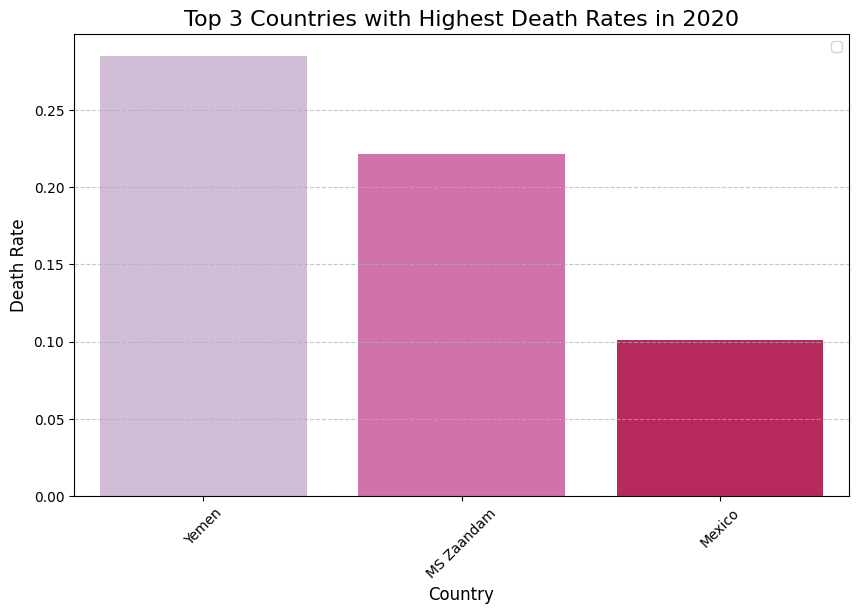

In [105]:
merged_data_2020  = merged_dataset[merged_dataset['Date'].dt.year == 2020].copy()
country_summary_2020 = merged_data_2020.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
country_summary_2020['Death Rate'] = (country_summary_2020['Deaths'] / country_summary_2020['Confirmed']).fillna(0)
Top_3_countries_death_rate = country_summary_2020.sort_values(by='Death Rate', ascending=False).head(3)
print(Top_3_countries_death_rate)
T3= Top_3_countries_death_rate['Country/Region'].to_list()
print(f"Top 3 countries with highest death rates throughout 2020 are: {T3}\nThis shows the poor healthcare systems of these countries \n")

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_3_countries_death_rate, x='Country/Region', y='Death Rate',hue='Country/Region', palette='PuRd')
plt.title('Top 3 Countries with Highest Death Rates in 2020', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Q8.2: Comparing the the total number of recoveries to the total number of deaths in South Africa

Total Number Of Deaths in South Africa: 10250036.0
Total Number Of Recoveries in South Africa: 310037573.0
In South Africa, the total number of recoveries is greater than the total number of deaths.


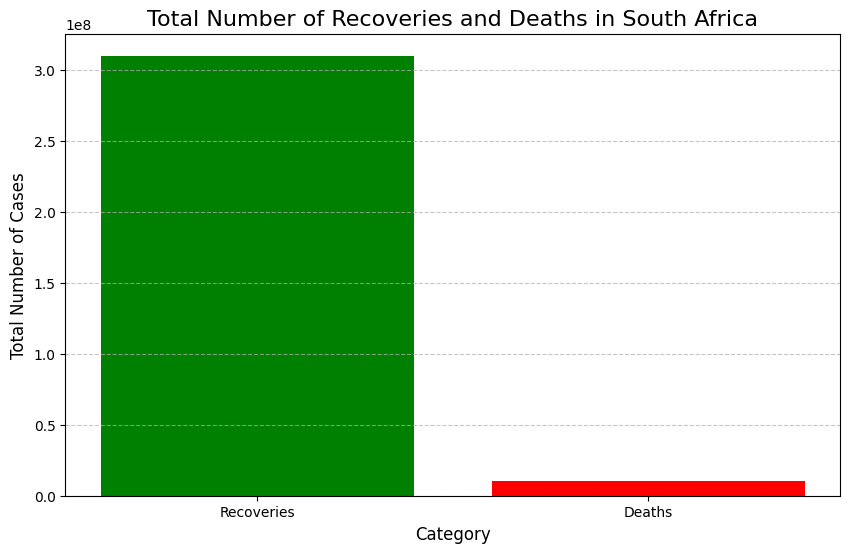

In [101]:
South_Africa_data = merged_dataset[merged_dataset['Country/Region'] == 'South Africa']
South_Africa_summary = South_Africa_data.groupby('Country/Region')[['Deaths', 'Recovered']].sum().reset_index()

South_Africa_deaths = South_Africa_summary['Deaths'].iloc[0]
South_Africa_recoveries = South_Africa_summary['Recovered'].iloc[0]

print(f"Total Number Of Deaths in South Africa: {South_Africa_deaths}")
print(f"Total Number Of Recoveries in South Africa: {South_Africa_recoveries}")

if South_Africa_recoveries > South_Africa_deaths:
    print("In South Africa, the total number of recoveries is greater than the total number of deaths.")
elif South_Africa_deaths > South_Africa_recoveries:
    print("In South Africa, the total number of deaths is greater than the total number of recoveries.")
else:
    print("In South Africa, the total number of recoveries is equal to the total number of deaths.")

#Comparison using graph
plt.figure(figsize=(10, 6))
plt.bar(['Recoveries', 'Deaths'], [South_Africa_recoveries, South_Africa_deaths], color=['green', 'red'])
plt.title('Total Number of Recoveries and Deaths in South Africa', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Number of Cases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Q8.3: Analyzing the ratio of recoveries to the confirmed for united states monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio?

Monthly Recovery Ratio for United States (March 2020 - May 2021):
      Month    Confirmed    Recovered  Recovery Ratio
0   2020-03    1120122.0      19730.0        0.017614
1   2020-04   19959287.0    1747977.0        0.087577
2   2020-05   45533906.0    8720047.0        0.191507
3   2020-06   64964762.0   17434297.0        0.268365
4   2020-07  111371152.0   34028380.0        0.305540
5   2020-08  166357378.0   56877502.0        0.341899
6   2020-09  199220181.0   75486815.0        0.378911
7   2020-10  251406215.0   99506279.0        0.395799
8   2020-11  339796331.0  128470711.0        0.378082
9   2020-12  528139775.0   74680002.0        0.141402
10  2021-01  730894746.0          0.0        0.000000
11  2021-02  774254261.0          0.0        0.000000
12  2021-03  916643837.0          0.0        0.000000
13  2021-04  944543693.0          0.0        0.000000
14  2021-05  953529915.0          0.0        0.000000

Month with the highest recovery ratio:
Month                 2020-10


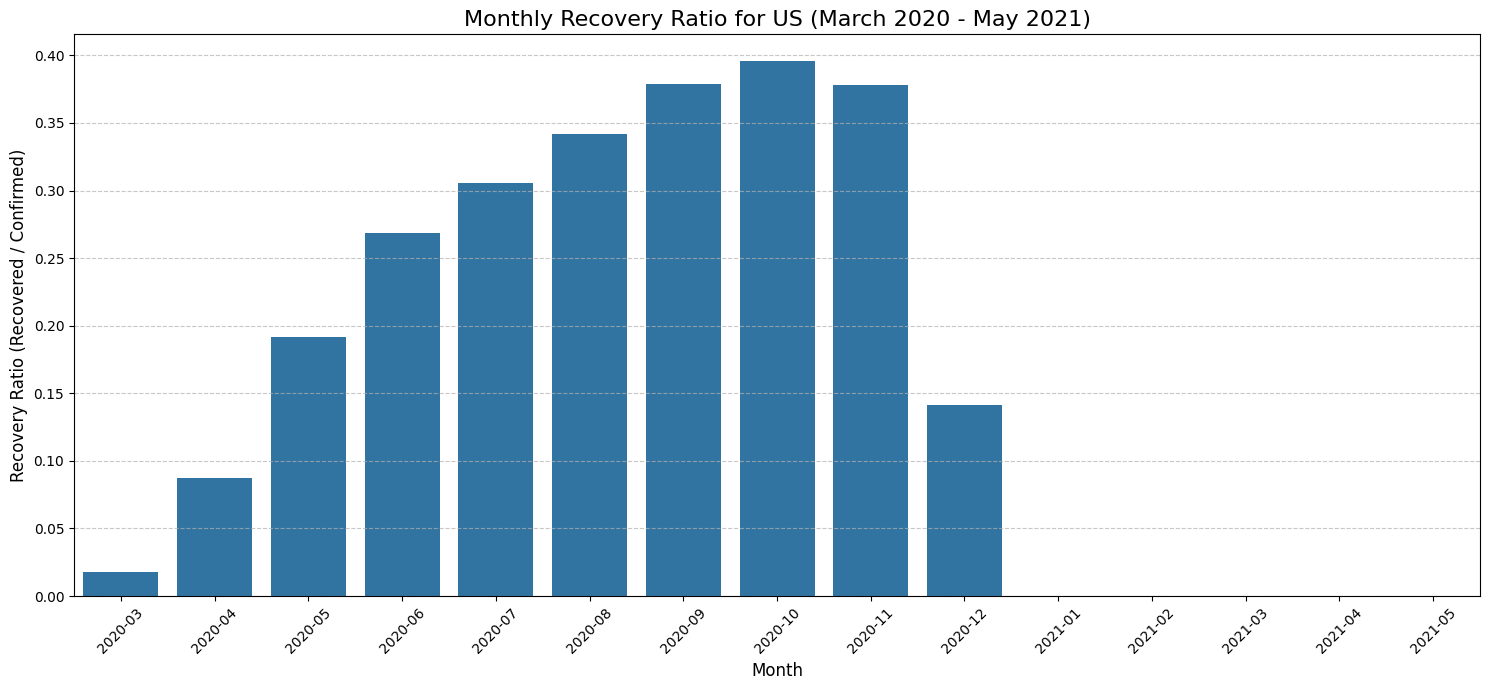

In [89]:
US_data = merged_dataset[merged_dataset['Country/Region'] == 'US'].copy()
US_data['Date'] = pd.to_datetime(US_data['Date'])

start_date = '2020-03-01'
end_date = '2021-05-31'
US_data_filtered = US_data[(US_data['Date'] >= start_date) & (US_data['Date'] <= end_date)].copy()

US_data_filtered['Month'] = US_data_filtered['Date'].dt.to_period('M')

US_monthly_summary = US_data_filtered.groupby('Month')[['Confirmed', 'Recovered']].sum().reset_index()
US_monthly_summary['Recovery Ratio'] = (US_monthly_summary['Recovered'] /US_monthly_summary['Confirmed']).fillna(0)
US_monthly_summary['Month'] = US_monthly_summary['Month'].astype(str)

highest_ratio_month = US_monthly_summary.loc[US_monthly_summary['Recovery Ratio'].idxmax()]

print(f"Monthly Recovery Ratio for United States (March 2020 - May 2021):\n{US_monthly_summary}\n")
print(f"Month with the highest recovery ratio:\n{highest_ratio_month} \nThe highest COVID-19 recovery ratio in the US in {highest_ratio_month} were likely due to delayed data reporting and improved treatments.")


plt.figure(figsize=(15, 7))
sns.barplot(data=US_monthly_summary, x='Month', y='Recovery Ratio')
plt.title('Monthly Recovery Ratio for US (March 2020 - May 2021)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Recovery Ratio (Recovered / Confirmed)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()